In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [3]:
# class RecurrentNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(RecurrentNeuralNetwork, self).__init__()
#         hidden = torch.zeros(5,15)
#         cell =  torch.zeros(5,15)
#         self.batch =  (hidden, cell)
#         self.fc1 = nn.Linear(24, 30)   
#         self.rnn = nn.LSTM(30,15 , 5,batch_first=True)
#         self.fc2 = nn.Linear(15, 1)
#         self.relu =  nn.ReLU()
#         self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # Agregamos LeakyReLU
#         self.sigmoid = nn.Identity()

#     def forward(self, x): 
#         x = self.relu(self.fc1(x)) 
#         x = self.leaky_relu(x)  
#         x, self.batch = self.rnn(x, self.batch)
#         x = self.leaky_relu(x)  
#         x = self.fc2(x)
#         x = self.sigmoid(x)
#         return x


In [4]:
train_data = pd.read_csv('/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results/train_dataset_pca.csv')
test_data = pd.read_csv('/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results/test_dataset_pca.csv')

In [5]:
train_data.shape.__getitem__(1)

25

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X_train = torch.tensor(train_data.drop('category', axis=1).values).float()

y_train = torch.tensor(train_data['category'].values).view(-1, 1).float()
X_test = torch.tensor(test_data.drop('category', axis=1).values).float()
y_test = torch.tensor(test_data['category'].values).view(-1, 1).float()

In [8]:
X_test

tensor([[-1.8719e+00,  9.5374e-01, -9.2541e-03,  ..., -3.0361e-01,
          1.0119e-02,  4.2599e-01],
        [-1.5269e+00,  1.1766e+00, -5.7230e-02,  ..., -9.8120e-02,
          2.8355e-03, -1.7259e-01],
        [ 2.7619e+00,  3.0633e+00, -1.2302e+00,  ..., -2.6059e+00,
          7.4816e-02, -1.8710e+00],
        ...,
        [-2.5090e+00, -1.0908e+00,  5.1043e-01,  ...,  9.2696e-02,
          1.6503e-02, -5.2496e-01],
        [ 2.9256e+00, -8.6861e+00,  1.3898e+00,  ...,  3.6282e-02,
          2.8569e-03, -6.9891e-03],
        [-1.8811e+00,  9.3592e-01, -5.5224e-03,  ..., -3.4036e-01,
          1.0854e-02,  4.2303e-01]])

In [9]:

train_data.head()

,PCS-0,PCS-1,PCS-2,PCS-3,PCS-4,PCS-5,PCS-6,PCS-7,PCS-8,PCS-9,...,PCS-15,PCS-16,PCS-17,PCS-18,PCS-19,PCS-20,PCS-21,PCS-22,PCS-23,category
0,-1.719427,1.041112,-0.029033,-0.033945,0.488359,-0.320245,0.675607,0.040008,-0.850674,0.904590,...,0.166457,0.296350,0.170225,0.126065,-0.012936,-0.078119,-0.217705,0.006862,0.172171,0
1,-2.513016,0.378792,0.180003,-0.033389,0.509032,-0.166350,0.247207,-0.138200,0.478633,-0.355185,...,-0.423369,0.428696,-0.498758,-0.567661,0.053651,0.042064,-0.002884,0.018795,-0.570877,0
2,7.169543,0.970827,-0.545971,0.185807,-3.243937,-0.199090,-1.077415,-0.185070,1.729826,0.188037,...,-1.130055,-0.283804,0.332416,0.275258,-0.572652,-0.638327,0.332787,-0.019409,0.268257,1
3,-2.484802,0.321382,0.182738,-0.022501,0.317128,-0.203769,0.532316,-0.171392,0.235577,-0.311109,...,-0.340788,0.405275,-0.597997,-0.307447,0.088032,0.105859,0.135460,0.017582,-0.613108,0
4,0.095984,-6.182967,0.574045,0.176454,-3.033600,-0.513644,0.781771,1.736568,1.722352,-6.504171,...,2.019361,-2.565433,2.824614,-0.946937,0.259488,-0.222455,1.541727,-0.026497,-0.191912,0


In [10]:
X_train[0]

tensor([-1.7194e+00,  1.0411e+00, -2.9033e-02, -3.3945e-02,  4.8836e-01,
        -3.2024e-01,  6.7561e-01,  4.0008e-02, -8.5067e-01,  9.0459e-01,
         1.4184e+00,  1.5811e-01, -1.1586e-03,  1.9821e-01, -2.6115e-01,
         1.6646e-01,  2.9635e-01,  1.7022e-01,  1.2607e-01, -1.2936e-02,
        -7.8119e-02, -2.1770e-01,  6.8619e-03,  1.7217e-01])

In [11]:
X_train.shape

torch.Size([2218023, 24])

In [46]:
class NeuralNetwork(nn.Module):
    def __init__(self, size_input):
        super(NeuralNetwork, self).__init__()
        self.hidden_size = 15
        self.num_layers = 5
        self.fc1 = nn.Linear(size_input, 30)
        self.fc3 = nn.Linear(self.hidden_size, 15)
        self.fc4 = nn.Linear(30, 50) 
        self.fc7 = nn.Linear(50, 1)
        self.fc5 = nn.Linear(50, self.hidden_size)
        self.fc6 = nn.Linear(self.hidden_size, 50)

        self.relu = nn.ELU()
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        # x, (hidden, cell) = self.rnn(x)
        # x = self.relu(x)
        x = self.fc4(x) 
        x = self.relu(x)
        x = self.fc5(x)
        x =  self.relu(x)
        x =  self.fc6(x)
        x =  self.relu(x)
        x =  self.fc7(x)
        x = self.sigmoid(x)
        return x


In [41]:
class CNNNetwork(nn.Module):
    def __init__(self, input_size):
        super(CNNNetwork, self).__init__()
        self.fc1 =  nn.Linear(in_features=input_size, out_features=32)
        self.fc1 =  nn.Linear(in_features=32, out_features=64)
        self.fc1 =  nn.Linear(in_features=64, out_features=128)
        self.cnn1 =  nn.Conv1d(in_channels=128, out_channels=256, kernel_size=(3,3))
        self.linearFinal =  nn.Linear(in_features=20, out_features=2)
    def forward(self, x):
        print("initial: ",x.size())
        x =  self.fc1(x)
        print(x.sixe())
        return x


In [25]:
X_train.shape.__getitem__(1)

24

In [51]:

model = NeuralNetwork(X_train.shape.__getitem__(1))
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.3)
criterion = nn.BCEWithLogitsLoss().to(device)
loss_values = []
accuracy_values = []

num_epochs = 150
batch_size = 500  # Reduje el tamaño del lote

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    total_batches = 0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        batch_y = y_train[i:i + batch_size]
        outputs = model(batch_X.to(device)) 
        optimizer.zero_grad()
        loss = criterion(outputs, batch_y.to(device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_batches += 1
        print(total_loss / total_batches, end='\r')

    average_loss = total_loss / total_batches
    loss_values.append(average_loss)
    model.eval()
    with torch.no_grad():
        outputs = model(X_test.to(device))
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_test.to(device)).float().mean()
        accuracy_values.append(accuracy.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Avg. Loss: {average_loss}, Accuracy: {accuracy.item()}')

Epoch [1/150], Avg. Loss: 0.6944391753642924, Accuracy: 0.5332985520362854
Epoch [2/150], Avg. Loss: 0.6929245058792197, Accuracy: 0.5332985520362854
Epoch [3/150], Avg. Loss: 0.6927592932492838, Accuracy: 0.5333201885223389
Epoch [4/150], Avg. Loss: 0.6925468095417681, Accuracy: 0.5333823561668396
Epoch [5/150], Avg. Loss: 0.6923882400019631, Accuracy: 0.5337204933166504
Epoch [6/150], Avg. Loss: 0.692208491119684, Accuracy: 0.5340830087661743
Epoch [7/150], Avg. Loss: 0.6920032558581946, Accuracy: 0.5343021154403687
Epoch [8/150], Avg. Loss: 0.6918558865778882, Accuracy: 0.5343562364578247
Epoch [9/150], Avg. Loss: 0.6917595402168641, Accuracy: 0.5343508124351501
Epoch [10/150], Avg. Loss: 0.6916928559991726, Accuracy: 0.5343859791755676
Epoch [11/150], Avg. Loss: 0.6916423170905621, Accuracy: 0.534423828125
Epoch [12/150], Avg. Loss: 0.6916013686593008, Accuracy: 0.5343778729438782
Epoch [13/150], Avg. Loss: 0.6915671282021989, Accuracy: 0.5350622534751892
Epoch [14/150], Avg. Loss:

In [72]:

with torch.no_grad():
    outputs = model(X_test)
    print(outputs)
    # predicted = (outputs > 0.5).float()
    # accuracy = (predicted == y_test).float().mean()
    # accuracy_values.append(accuracy.item())
    # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy.item()}')

tensor([[0.0808],
        [0.0674],
        [0.0610],
        ...,
        [0.0524],
        [0.0524],
        [0.0524]])


In [80]:
loss = criterion(outputs, y_test)

In [81]:
loss

tensor(0.6952)

AttributeError: 'Tensor' object has no attribute 'hist'

In [89]:
f = (outputs > 0.5).float()
accuracy = (predicted == y_test)

In [90]:
accuracy

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [False]])

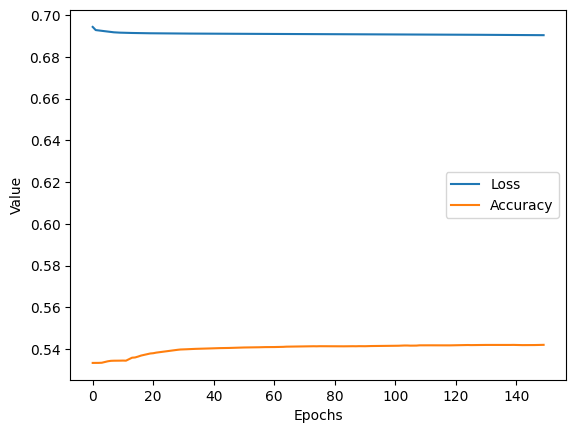

In [52]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()

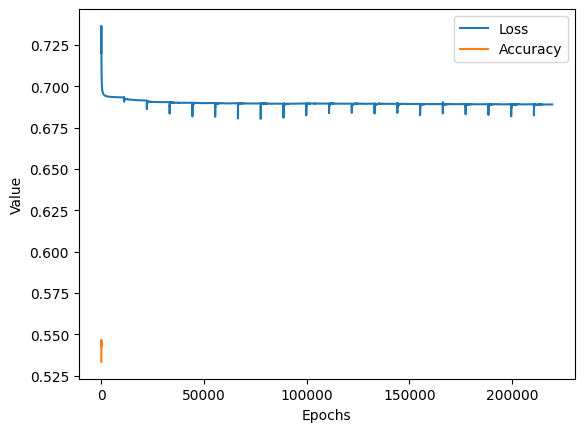

In [42]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()

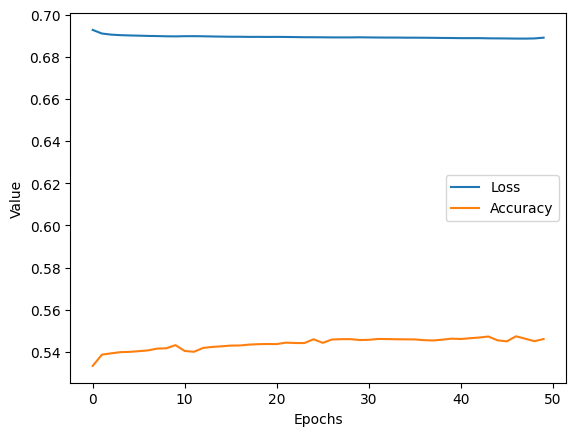

In [44]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()

In [10]:
accuracy_values

[0.5470033288002014,
 0.5483744144439697,
 0.5508905649185181,
 0.5538797378540039,
 0.5566412210464478,
 0.5595460534095764,
 0.561373770236969,
 0.5621266961097717,
 0.5622444152832031,
 0.5621718168258667]

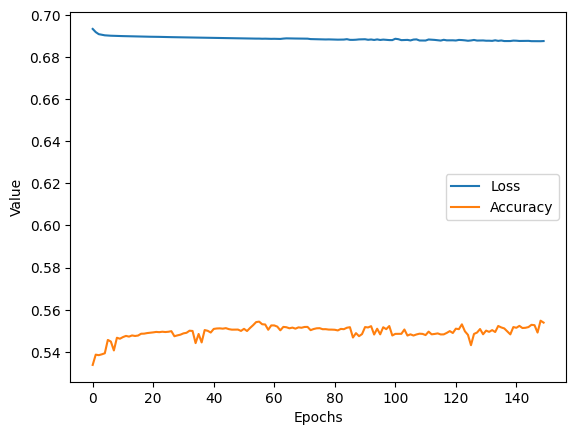

In [61]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()

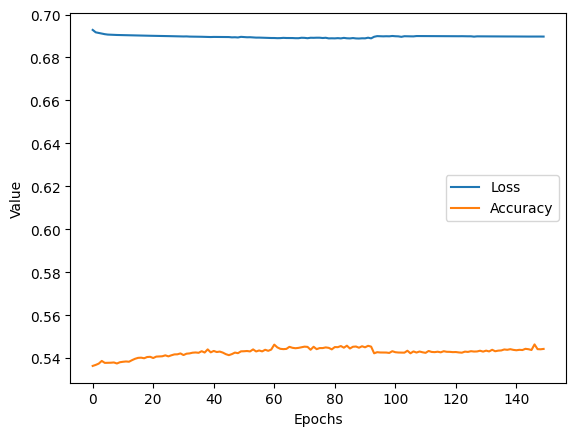

In [50]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()